In [57]:
import pandas as pd

# Load the file
file_path = "Downloads/GTEx_Analysis_v10_RNASeQCv2.4.2_gene_median_tpm.gct.gz"
data = pd.read_csv(file_path, sep="\t", skiprows=2)

# Rename columns for clarity
data.rename(columns={"Description": "Gene"}, inplace=True)

# Display first few rows
print(data.head())


                Name         Gene  Adipose_Subcutaneous  \
0  ENSG00000223972.5      DDX11L1               0.00000   
1  ENSG00000227232.5       WASH7P               3.99789   
2  ENSG00000278267.1    MIR6859-1               0.00000   
3  ENSG00000243485.5  MIR1302-2HG               0.00000   
4  ENSG00000237613.2      FAM138A               0.00000   

   Adipose_Visceral_Omentum  Adrenal_Gland  Artery_Aorta  Artery_Coronary  \
0                   0.00000        0.00000        0.0000          0.00000   
1                   3.17815        2.67308        4.0708          3.87547   
2                   0.00000        0.00000        0.0000          0.00000   
3                   0.00000        0.00000        0.0000          0.00000   
4                   0.00000        0.00000        0.0000          0.00000   

   Artery_Tibial  Bladder  Brain_Amygdala  ...   Spleen  Stomach  \
0        0.00000  0.00000         0.00000  ...  0.00000  0.00000   
1        3.62625  5.05094         1.45902  ...

In [58]:
# Select relevant columns for brain and heart tissues
brain_columns = [col for col in data.columns if "Brain" in col]
heart_columns = [col for col in data.columns if "Heart" in col]

# Calculate average median TPM for brain and heart
data["Brain_Median_TPM"] = data[brain_columns].mean(axis=1)
data["Heart_Median_TPM"] = data[heart_columns].mean(axis=1)

# Keep only relevant columns
filtered_data = data[["Gene", "Brain_Median_TPM", "Heart_Median_TPM"]]

# Display filtered data
print(filtered_data.head())


          Gene  Brain_Median_TPM  Heart_Median_TPM
0      DDX11L1          0.000000          0.000000
1       WASH7P          2.414706          1.163663
2    MIR6859-1          0.000000          0.000000
3  MIR1302-2HG          0.011378          0.007377
4      FAM138A          0.000000          0.000000


In [59]:
# Top 5 expressed genes in the brain
top_brain_genes = filtered_data.nlargest(5, "Brain_Median_TPM")
print("Top 5 Brain Genes:\n", top_brain_genes)

# Top 5 expressed genes in the heart
top_heart_genes = filtered_data.nlargest(5, "Heart_Median_TPM")
print("Top 5 Heart Genes:\n", top_heart_genes)


Top 5 Brain Genes:
           Gene  Brain_Median_TPM  Heart_Median_TPM
58999  MT-RNR2      70552.184615          34524.05
59014   MT-CO2      65707.038462          54611.00
59018   MT-CO3      57268.638462          64425.00
59017  MT-ATP6      55603.769231          64956.40
59011   MT-CO1      55540.369231          76007.00
Top 5 Heart Genes:
           Gene  Brain_Median_TPM  Heart_Median_TPM
59011   MT-CO1      55540.369231           76007.0
59017  MT-ATP6      55603.769231           64956.4
59018   MT-CO3      57268.638462           64425.0
59023   MT-ND4      51423.876923           60821.4
59014   MT-CO2      65707.038462           54611.0


In [67]:
# Compute fold-change between brain and heart
filtered_data.loc[:,"Fold_Change"] = filtered_data["Brain_Median_TPM"] / filtered_data["Heart_Median_TPM"]

# Genes with highest fold-change (brain vs. heart)
top_diff_genes = filtered_data.nlargest(10, "Fold_Change")
print("Top 10 Differentially Expressed Genes:\n", top_diff_genes)


Top 10 Differentially Expressed Genes:
                 Gene  Brain_Median_TPM  Heart_Median_TPM  Fold_Change
27   ENSG00000250575          0.005852               0.0          inf
140  ENSG00000226969          0.005022               0.0          inf
155  ENSG00000224387          1.941372               0.0          inf
156  ENSG00000229393          2.180584               0.0          inf
164  ENSG00000289610          0.043953               0.0          inf
167        MMEL1-AS1          0.051896               0.0          inf
169  ENSG00000285945          0.172247               0.0          inf
170  ENSG00000283259          0.038703               0.0          inf
174  ENSG00000284745          0.048961               0.0          inf
175           ACTRT2          0.002715               0.0          inf


C:\Users\User\AppData\Local\Temp\ipykernel_19176\2663110359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:,"Fold_Change"] = filtered_data["Brain_Median_TPM"] / filtered_data["Heart_Median_TPM"]


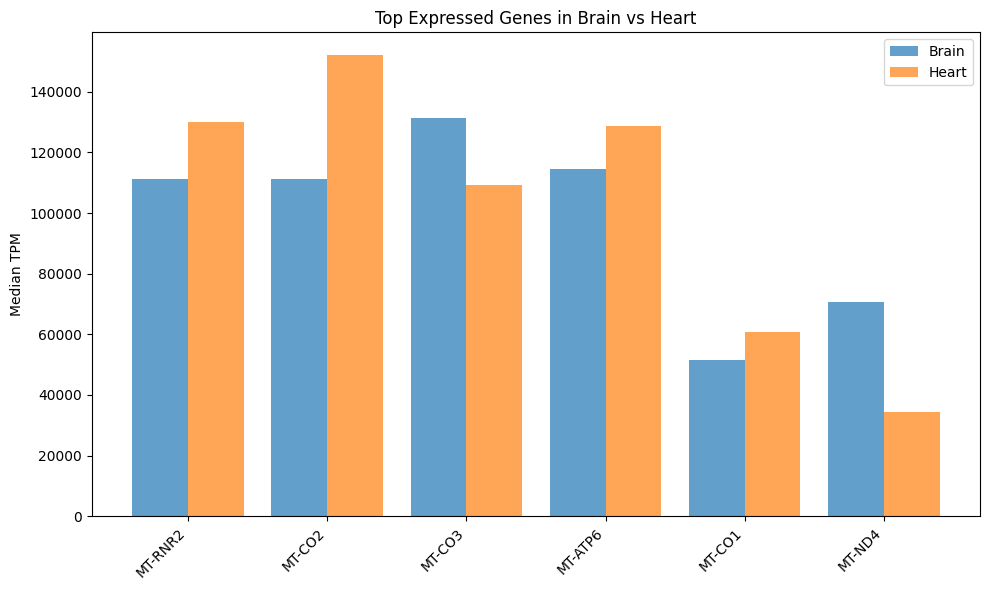

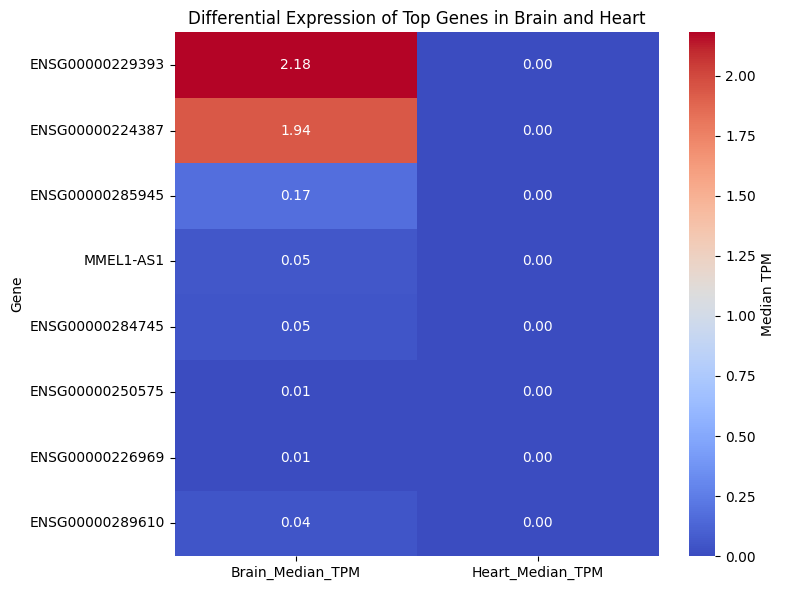

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure non-overlapping bars by using np.arange for x-axis positions
plt.figure(figsize=(10, 6))

genes = genes_to_plot["Gene"].unique()  # Get unique genes
x = np.arange(len(genes))  # X positions for bars

brain_tpm = genes_to_plot.groupby("Gene")["Brain_Median_TPM"].sum()
heart_tpm = genes_to_plot.groupby("Gene")["Heart_Median_TPM"].sum()

plt.bar(x - 0.2, brain_tpm, width=0.4, label="Brain", alpha=0.7)
plt.bar(x + 0.2, heart_tpm, width=0.4, label="Heart", alpha=0.7)

plt.xticks(x, genes, rotation=45, ha='right')
plt.ylabel("Median TPM")
plt.title("Top Expressed Genes in Brain vs Heart")
plt.legend()
plt.tight_layout()
plt.show()

# Find top 5 genes for Brain and Heart based on median TPM
top_brain_genes = top_diff_genes.nlargest(5, "Brain_Median_TPM")
top_heart_genes = top_diff_genes.nlargest(5, "Heart_Median_TPM")

# Combine the two sets of top genes
combined_top_genes = pd.concat([top_brain_genes, top_heart_genes]).drop_duplicates(subset="Gene")

# Create the heatmap DataFrame
heatmap_data = combined_top_genes.set_index("Gene")[["Brain_Median_TPM", "Heart_Median_TPM"]]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Median TPM"}
)
plt.title("Differential Expression of Top Genes in Brain and Heart")
plt.tight_layout()
plt.show()
